<a href="https://colab.research.google.com/github/tsamarahanifa/Project-Googlecolabs/blob/master/grape_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "tsamarahanifa" 
os.environ['KAGGLE_KEY'] = "ec93d0f77352bad0ead5bf45e6df4a3b" 
!kaggle datasets download -d abbasataie/grapeleafs

 50% 14.0M/27.9M [00:00<00:00, 35.5MB/s]
100% 27.9M/27.9M [00:00<00:00, 80.3MB/s]


In [ ]:
import zipfile
local_zip = '/content/grapeleafs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/Data')
zip_ref.close()

In [ ]:
os.listdir('/tmp/Data/Grape')

['Grape___Black_rot',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy']

In [ ]:
base_dir = '/tmp/Data/Grape'
train_dir = os.path.join(base_dir)
validation_dir = os.path.join(base_dir)

In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) 

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150), 
        batch_size=16,
        class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
        validation_dir, 
        target_size=(150, 150), 
        batch_size=16,
        class_mode='categorical')

Found 1680 images belonging to 4 classes.
Found 1680 images belonging to 4 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='sigmoid')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=25,  
      epochs=20,
      validation_data=validation_generator  , 
      validation_steps=10,  
      verbose=2)

Epoch 1/20
25/25 - 21s - loss: 1.1229 - accuracy: 0.4925 - val_loss: 1.0278 - val_accuracy: 0.6187
Epoch 2/20
25/25 - 20s - loss: 0.9279 - accuracy: 0.6375 - val_loss: 0.9012 - val_accuracy: 0.5562
Epoch 3/20
25/25 - 20s - loss: 0.8249 - accuracy: 0.6500 - val_loss: 0.7595 - val_accuracy: 0.6750
Epoch 4/20
25/25 - 20s - loss: 0.7197 - accuracy: 0.7025 - val_loss: 0.6424 - val_accuracy: 0.7563
Epoch 5/20
25/25 - 20s - loss: 0.6274 - accuracy: 0.7425 - val_loss: 0.5833 - val_accuracy: 0.7875
Epoch 6/20
25/25 - 20s - loss: 0.5368 - accuracy: 0.7825 - val_loss: 0.6918 - val_accuracy: 0.6938
Epoch 7/20
25/25 - 20s - loss: 0.5734 - accuracy: 0.7800 - val_loss: 0.4629 - val_accuracy: 0.8188
Epoch 8/20
25/25 - 20s - loss: 0.5261 - accuracy: 0.7900 - val_loss: 0.5544 - val_accuracy: 0.7937
Epoch 9/20
25/25 - 20s - loss: 0.4420 - accuracy: 0.8300 - val_loss: 0.2801 - val_accuracy: 0.9062
Epoch 10/20
25/25 - 20s - loss: 0.4054 - accuracy: 0.8425 - val_loss: 0.3245 - val_accuracy: 0.8750
Epoch 11/

Saving daun-koenigin-der-weingaerten.jpg to daun-koenigin-der-weingaerten (1).jpg
daun-koenigin-der-weingaerten.jpg
[[1. 0. 1. 1.]]
healthy


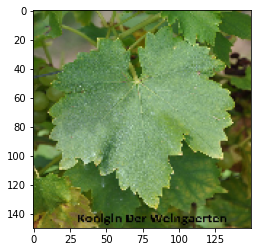

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  print(classes)

  predict = str(classes)
  if (predict=="[[1. 0. 1. 1.]]"):
    print('healthy')
  elif (predict=="[[0. 1. 0.]]"):
    print('rock')
  elif (predict=="[[0. 0. 1.]]"):
    print ('scissors')

Saving black rot 1.jpg to black rot 1 (1).jpg
black rot 1.jpg
[[1. 1. 0. 0.]]
Black Rot


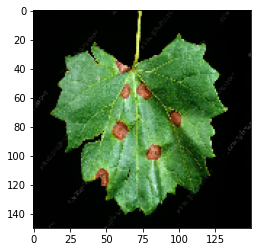

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  print(classes)

  predict = str(classes)
  if (predict=="[[1. 0. 1. 1.]]"):
    print('healthy')
  elif (predict=="[[1. 1. 0. 0.]]"):
    print('Black Rot')
  elif (predict=="[[0. 0. 1.]]"):
    print ('scissors')

Saving black m2.jpeg to black m2 (1).jpeg
black m2.jpeg
[[1. 1. 1. 0.]]
Black mesies


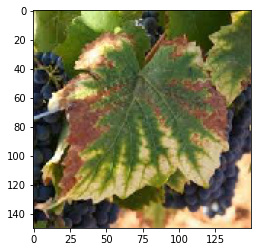

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  print(classes)

  predict = str(classes)
  if (predict=="[[1. 0. 1. 1.]]"):
    print('healthy')
  elif (predict=="[[1. 1. 0. 0.]]"):
    print('Black Rot')
  elif (predict=="[[1. 1. 1. 0.]]"):
    print ('Black mesies')

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  print(classes)

  predict = str(classes)
  if (predict=="[[1. 0. 1. 1.]]"):
    print('healthy')
  elif (predict=="[[1. 1. 0. 0.]]"):
    print('Black Rot')
  elif (predict=="[[1. 1. 1. 0.]]"):
    print ('Black mesies')
  elif (predict=="[[0. 1. 1. 1.]]"):
    print ('isariopisis')
  else :
    print ('error')

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  print(classes)

  predict = str(classes)
  if (predict=="[[1. 0. 1. 1.]]"):
    print('healthy')
  elif (predict=="[[1. 1. 0. 0.]]"):
    print('Black Rot')
  elif (predict=="[[1. 1. 1. 0.]]"):
    print ('Black mesies')
  elif (predict=="[[0. 1. 1. 1.]]"):
    print ('isariopisis')
  else :
    print ('error')